## Agregação por distrito

Nesse notebook é feita a agregação dos dados por distritos do município

In [1]:
import geopandas as gpd
from shapely.geometry import LineString
from utils.save_shp import save_shp
from utils.load_csv import load_csv
from utils.load_shp import load_shp

In [2]:
df_final = load_csv("df_final.csv")

distritos = load_shp("distritos.shp")

In [3]:
df_final["lon"] = df_final["ponto_inicial"].apply(lambda x: eval(x)[0])
df_final["lat"] = df_final["ponto_inicial"].apply(lambda x: eval(x)[1])

In [4]:
gdf = gpd.GeoDataFrame(df_final, geometry=gpd.points_from_xy(df_final.lon, df_final.lat), crs="EPSG:4326")

In [5]:
trajetos = gdf.groupby("id_onibus")["geometry"].apply(lambda x: LineString(x.tolist()))
trajetos = gpd.GeoDataFrame(trajetos, geometry="geometry", crs="EPSG:4326").reset_index()

In [6]:
agregados = gdf.groupby("id_onibus").agg({
    "emissao_co2": "sum",  
    "eletrico": "any"       
}).reset_index()

trajetos = trajetos.merge(agregados, on="id_onibus", how="left")

In [7]:
trajetos

,id_onibus,geometry,emissao_co2,eletrico
0,1001,"LINESTRING (-46.61212 -23.52672, -46.61012 -23...",0.000410,True
1,1002,"LINESTRING (-46.61048 -23.49904, -46.60848 -23...",0.000619,True
2,1003,"LINESTRING (-46.62478 -23.50823, -46.62278 -23...",0.000909,False
3,1004,"LINESTRING (-46.64572 -23.52593, -46.64372 -23...",0.000410,False
4,1005,"LINESTRING (-46.61308 -23.53492, -46.61108 -23...",0.000410,False
5,1006,"LINESTRING (-46.57406 -23.54529, -46.57206 -23...",0.000938,False


<Axes: >

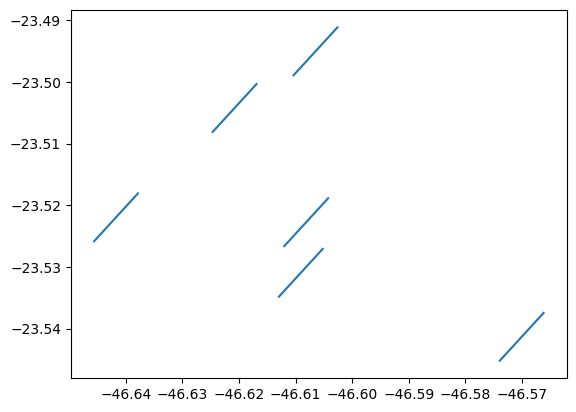

In [8]:
trajetos.plot()

In [9]:
trajetos = trajetos.to_crs(distritos.crs)

In [10]:
trajetos_distritos = gpd.sjoin(trajetos, distritos, how="inner", predicate="intersects")

trajetos_distritos

,id_onibus,geometry,emissao_co2,eletrico,index_right,cd_identif,cd_identi0,cd_distrit,nm_distrit,sg_distrit,tx_escala,sg_fonte_o,dt_criacao,dt_atualiz,cd_usuario,cd_tipo_di,qt_area_qu,qt_area_me
0,1001,"LINESTRING (335420.733 7397246.561, 335622.462...",0.000410,True,91,8583399.0,25.0,56,PARI,PRI,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,2.730,2729940.52
0,1001,"LINESTRING (335420.733 7397246.561, 335622.462...",0.000410,True,76,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70
1,1002,"LINESTRING (335553.706 7400313.049, 335755.483...",0.000619,True,76,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70
1,1002,"LINESTRING (335553.706 7400313.049, 335755.483...",0.000619,True,95,8583426.0,5.0,82,TUCURUVI,TUC,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,9.441,9441317.18
2,1003,"LINESTRING (334104.451 7399279.07, 334306.193 ...",0.000909,False,69,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80
3,1004,"LINESTRING (331989.004 7397294.618, 332190.686...",0.000410,False,39,8583449.0,9.0,9,BOM RETIRO,BRE,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,4.206,4205896.64
3,1004,"LINESTRING (331989.004 7397294.618, 332190.686...",0.000410,False,69,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80
4,1005,"LINESTRING (335333.2 7396337.369, 335534.914 7...",0.000410,False,52,8583450.0,25.0,10,BRAS,BRS,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,3.630,3629732.16
4,1005,"LINESTRING (335333.2 7396337.369, 335534.914 7...",0.000410,False,79,8583448.0,25.0,8,BELEM,BEL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,6.047,6046777.42
5,1006,"LINESTRING (339329.18 7395232.734, 339530.935 ...",0.000938,False,73,8583424.0,25.0,80,TATUAPE,TAT,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,8.514,8514313.05


In [11]:
gdf_overlay = gpd.overlay(trajetos, distritos, how="intersection")

gdf_overlay['distancia'] = gdf_overlay.geometry.length

gdf_overlay

,id_onibus,emissao_co2,eletrico,cd_identif,cd_identi0,cd_distrit,nm_distrit,sg_distrit,tx_escala,sg_fonte_o,dt_criacao,dt_atualiz,cd_usuario,cd_tipo_di,qt_area_qu,qt_area_me,geometry,distancia
0,1001,0.000410,True,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70,"LINESTRING (335760.168 7397623.07, 335824.198 ...",698.183024
1,1001,0.000410,True,8583399.0,25.0,56,PARI,PRI,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,2.730,2729940.52,"LINESTRING (335420.733 7397246.561, 335622.462...",506.927106
2,1002,0.000619,True,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70,"LINESTRING (335553.706 7400313.049, 335755.483...",950.726241
3,1002,0.000619,True,8583426.0,5.0,82,TUCURUVI,TUC,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,9.441,9441317.18,"LINESTRING (336190.408 7401019.087, 336360.853...",254.496648
4,1003,0.000909,False,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80,"LINESTRING (334104.451 7399279.07, 334306.193 ...",1205.192358
5,1004,0.000410,False,8583449.0,9.0,9,BOM RETIRO,BRE,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,4.206,4205896.64,"LINESTRING (331989.004 7397294.618, 332190.686...",1111.836013
6,1004,0.000410,False,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80,"LINESTRING (332733.31 7398120.565, 332795.767 ...",93.294290
7,1005,0.000410,False,8583450.0,25.0,10,BRAS,BRS,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,3.630,3629732.16,"LINESTRING (335333.2 7396337.369, 335428.183 7...",141.859978
8,1005,0.000410,False,8583448.0,25.0,8,BELEM,BEL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,6.047,6046777.42,"LINESTRING (335428.183 7396442.737, 335534.914...",1063.216954
9,1006,0.000938,False,8583424.0,25.0,80,TATUAPE,TAT,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,8.514,8514313.05,"LINESTRING (339329.18 7395232.734, 339530.935 ...",1205.015068


In [12]:
gdf_distrito = gdf_overlay.groupby('nm_distrit').agg({
    'distancia':'sum',
    "emissao_co2": 'sum',
    "eletrico": 'any'
}).reset_index()

In [13]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

distritos = distritos.merge(gdf_distrito, on='nm_distrit', how='left')
distritos_final = distritos.fillna(0)

In [14]:
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = UserWarning)

save_shp(distritos_final, "distritos_final.shp")

Shapefile salvo em data\distritos_final.shp
